In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import sklearn ,scipy

In [2]:
geo = pd.read_csv('Geo_scores.csv')
instance = pd.read_csv("instance_scores.csv")
lambdawts = pd.read_csv("Lambda_wts.csv")
qset = pd.read_csv("Qset_tats.csv")
test_data = pd.read_csv("test_share.csv")
train_data = pd.read_csv('train.csv') 

In [3]:
print("geo",geo.shape)
print("innstance",instance.shape)
print("lambdawts",lambdawts.shape)
print("qset",qset.shape)
print("test_data",test_data.shape)
print("train_data",train_data.shape)


geo (1424035, 2)
innstance (1424035, 2)
lambdawts (1400, 2)
qset (1424035, 2)
test_data (56962, 27)
train_data (227845, 28)


In [4]:
print("geo:",geo.columns)
print("innstance:",instance.columns)
print("lambdawts:",lambdawts.columns)
print("qset:",qset.columns)
print("test_data:",test_data.columns)
print("train_data:",train_data.columns)

geo: Index(['id', 'geo_score'], dtype='object')
innstance: Index(['id', 'instance_scores'], dtype='object')
lambdawts: Index(['Group', 'lambda_wt'], dtype='object')
qset: Index(['id', 'qsets_normalized_tat'], dtype='object')
test_data: Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT'],
      dtype='object')
train_data: Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target'],
      dtype='object')


In [5]:
print("geo id", geo['id'].nunique())
print()
print("instance id", instance['id'].nunique())
print()
print("Lambda Group", lambdawts['Group'].nunique())
print()
print("qset id", qset['id'].nunique())
print()
print("Test id", test_data['id'].nunique())
print()
print("Train Id", train_data['id'].nunique())
print()
print("Test Group", test_data['Group'].nunique())
print()
print("Train Group",train_data['Group'].nunique())

geo id 284807

instance id 284807

Lambda Group 1400

qset id 284807

Test id 56962

Train Id 227845

Test Group 915

Train Group 1301


In [6]:
train_data['data'] = 'train' # for identification
test_data['data'] = 'test'

In [7]:
train_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,...,0.630000,0.633333,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,0,train
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,...,0.356667,0.766667,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,0,train
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,...,0.510000,0.740000,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,0,train
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,...,0.606667,0.540000,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,0,train


In [8]:
test_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.576667,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.713333,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.433333,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.776667,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,test


In [9]:
#merging both datasets
all_data=pd.concat([train_data,test_data],axis=0)

In [10]:
all_data.shape

(284807, 29)

In [11]:
all_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [12]:
print("all_data id", all_data['id'].nunique())
print()
print("all_data group", all_data['Group'].nunique())

all_data id 284807

all_data group 1400


In [13]:
# above shows Id's are unique

In [14]:
print(geo.isnull().sum())
print()
print(instance.isnull().sum())
print()
print(lambdawts.isnull().sum())
print()
print(qset.isnull().sum())
print()
print(all_data.isnull().sum())

id               0
geo_score    71543
dtype: int64

id                 0
instance_scores    0
dtype: int64

Group        0
lambda_wt    0
dtype: int64

id                           0
qsets_normalized_tat    103201
dtype: int64

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
data                  0
dtype: int64


In [15]:
print(geo.describe())
print()
print(qset.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01

                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


In [16]:
# as values are very less,we will go with median to fill na values

In [17]:
geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat'] = qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [18]:
print(geo.isnull().sum())

id           0
geo_score    0
dtype: int64


In [19]:
print(qset.isnull().sum())

id                      0
qsets_normalized_tat    0
dtype: int64


In [20]:
geo.shape

(1424035, 2)

In [21]:
geo['id'].nunique()

284807

In [22]:
geo = geo.groupby('id').mean() # grouping the transactions of same id and taking the mean so that it can be considered as id to a single value

In [23]:
geo.shape

(284807, 1)

In [24]:
#applyying same for qset,instance
qset = qset.groupby('id').mean()

In [25]:
qset.shape

(284807, 1)

In [26]:
instance.shape

(1424035, 2)

In [27]:
instance = instance.groupby('id').mean()

In [28]:
lambdawts.shape

(1400, 2)

In [29]:
print(geo.shape)
print()
print(instance.shape)
print()
print(lambdawts.shape)
print()
print(qset.shape)
print()
print(all_data.shape)

(284807, 1)

(284807, 1)

(1400, 2)

(284807, 1)

(284807, 29)


In [30]:
all_data=pd.merge(all_data,geo ,on='id',how='left')

In [31]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850


In [32]:
instance.head()

,instance_scores
id,
0,0.09
1,-0.17
2,0.21
3,-0.05
4,0.75


In [33]:
all_data = pd.merge(all_data,instance , on='id', how='left')

In [34]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47


In [35]:
qset.head()

,qsets_normalized_tat
id,
0,0.214
1,-0.110
2,1.110
3,-0.676
4,-0.240


In [36]:
all_data = pd.merge(all_data,qset , on='id', how='left')

In [37]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630


In [38]:
lambdawts.head(2)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88


In [39]:
lambdawts.shape

(1400, 2)

In [40]:
lambdawts['Group'].nunique()

1400

In [41]:
all_data = pd.merge(all_data,lambdawts , on='Group', how='left')

In [42]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60


In [43]:
all_data['lambda_wt'].count()

284807

In [44]:
all_data['lambda_wt'].nunique()

1400

In [45]:
train_data=all_data[all_data['data']=='train']
test_data=all_data[all_data['data']=='test']

In [46]:
train_data.shape

(227845, 33)

In [47]:
test_data.shape

(56962, 33)

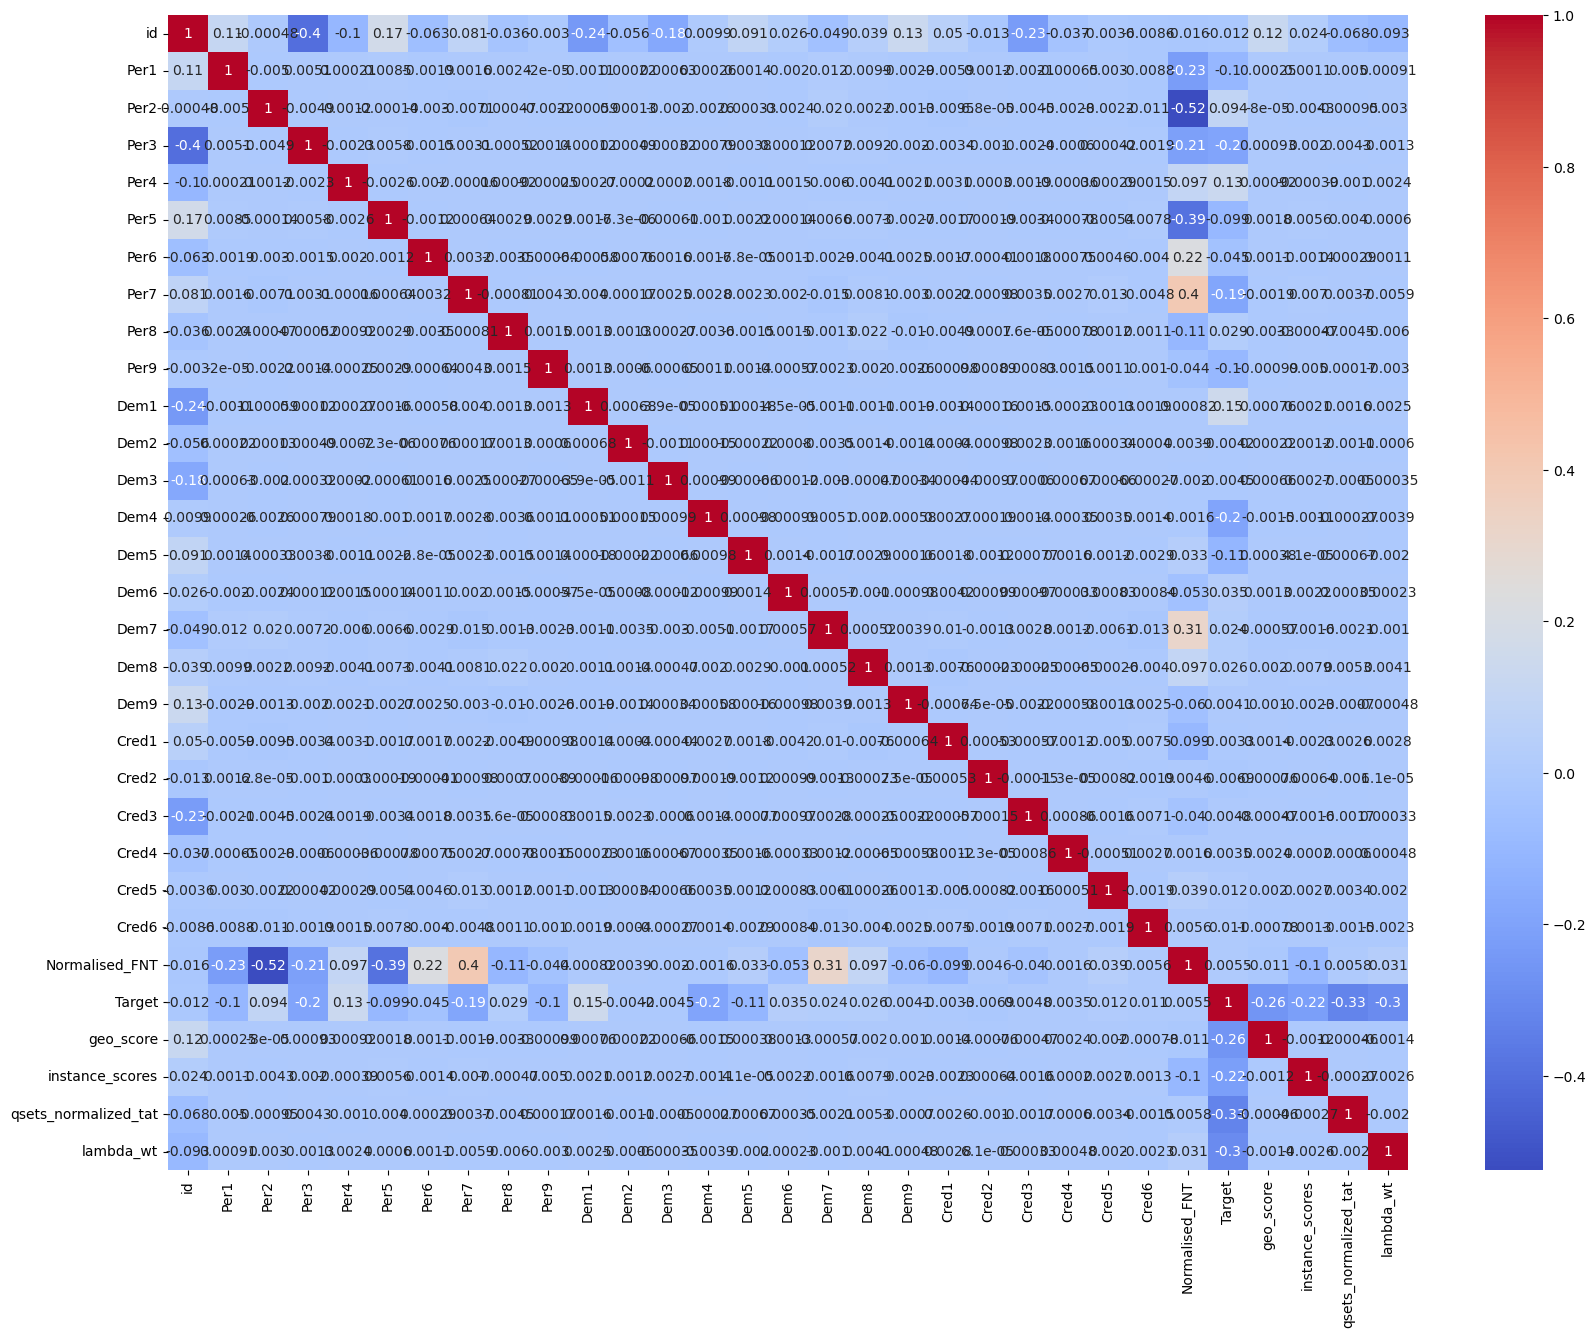

In [48]:
# Checking correlation
#VIF method can be used in regression problems
plt.figure(figsize=[20,15])
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [49]:
train_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [50]:
#splitting data into independent and dependent variables
x=train_data.drop(['id','Group','Target','data'],axis=1) #independent
y =train_data['Target'] #dependent
x1=x

In [51]:
x.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.140,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,-0.302,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,0.60


In [52]:
y.head() #all Nan as we have addded at the beginnning

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [53]:
test_data = test_data.drop(['id','Group','Target','data'], axis=1)

In [54]:
#Actual Data

In [55]:
x.isnull().sum()

Per1                    0
Per2                    0
Per3                    0
Per4                    0
Per5                    0
Per6                    0
Per7                    0
Per8                    0
Per9                    0
Dem1                    0
Dem2                    0
Dem3                    0
Dem4                    0
Dem5                    0
Dem6                    0
Dem7                    0
Dem8                    0
Dem9                    0
Cred1                   0
Cred2                   0
Cred3                   0
Cred4                   0
Cred5                   0
Cred6                   0
Normalised_FNT          0
geo_score               0
instance_scores         0
qsets_normalized_tat    0
lambda_wt               0
dtype: int64

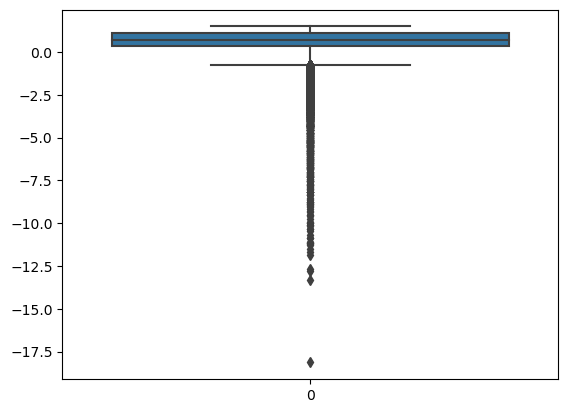

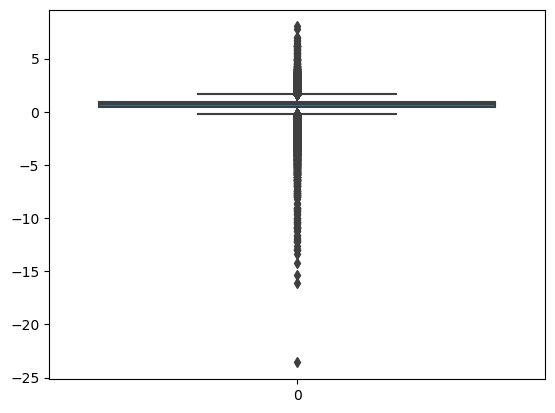

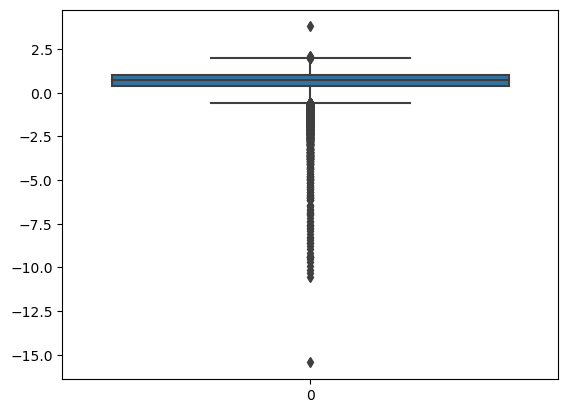

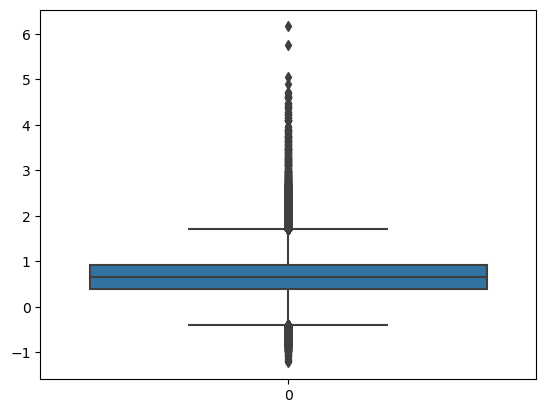

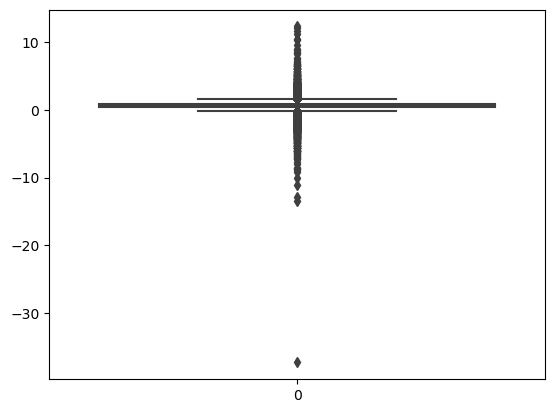

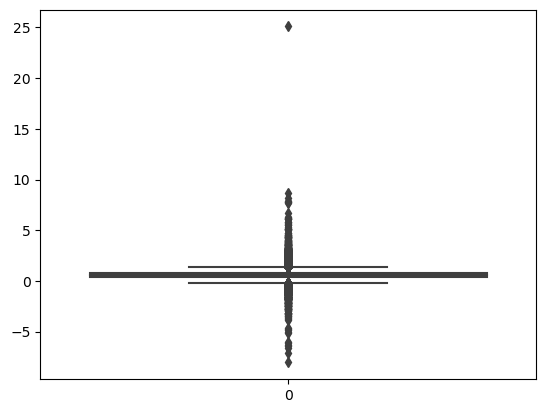

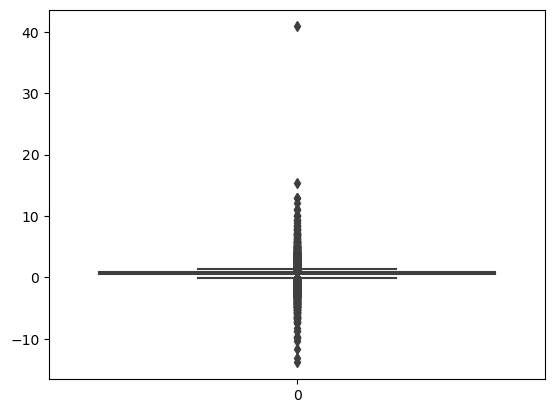

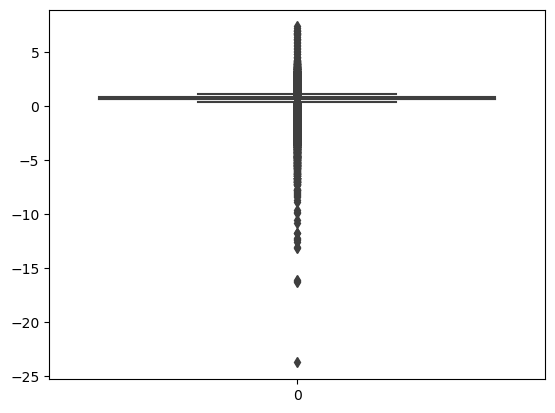

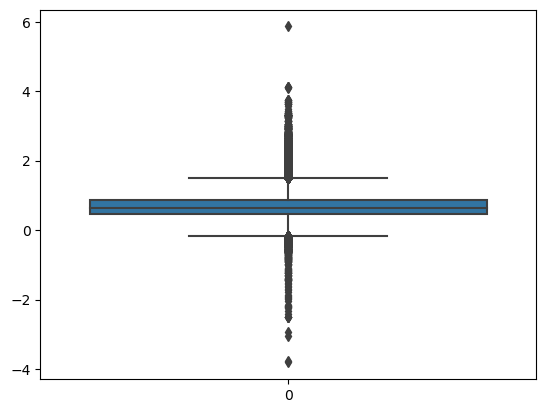

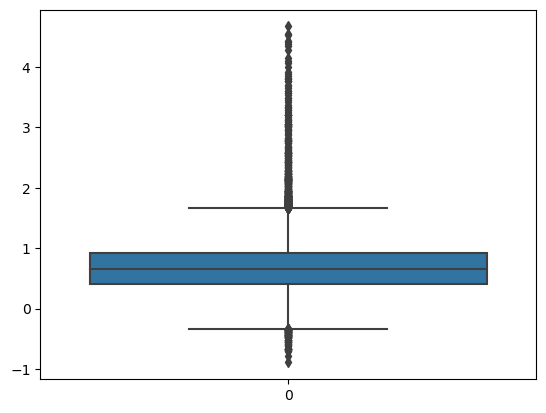

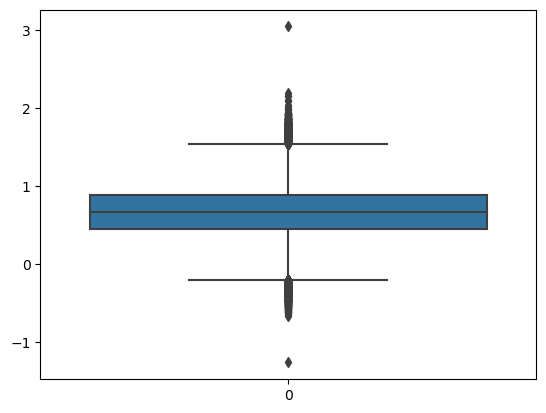

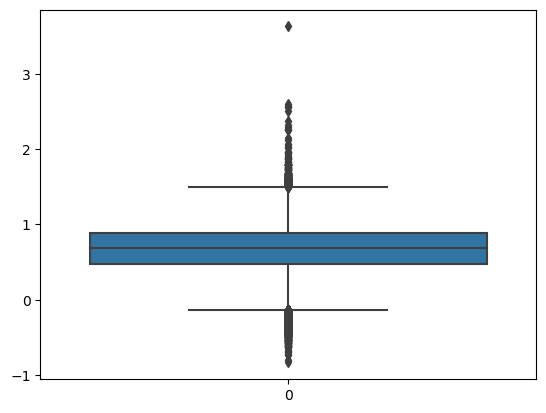

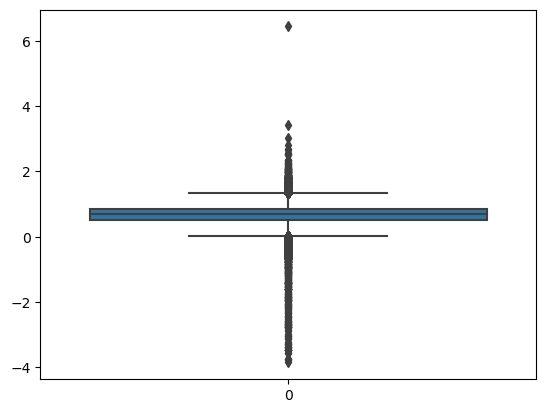

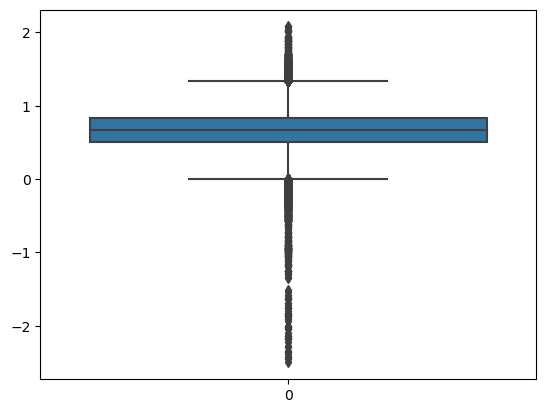

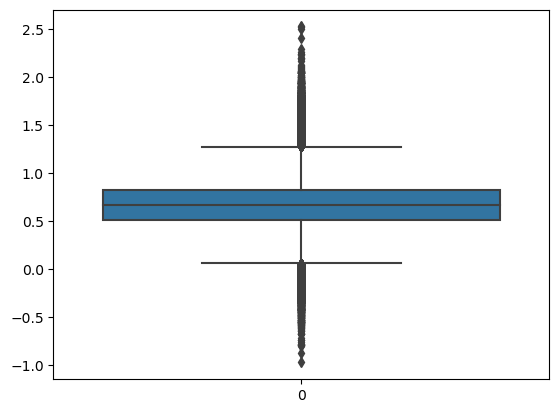

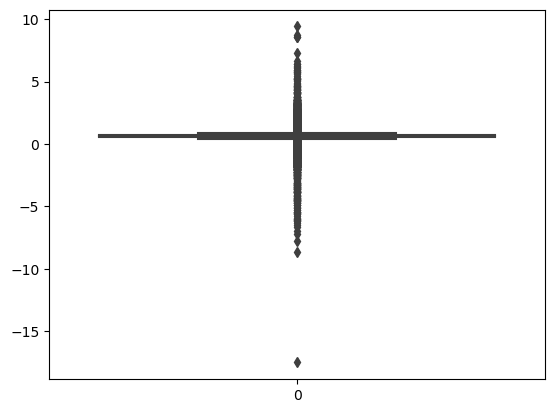

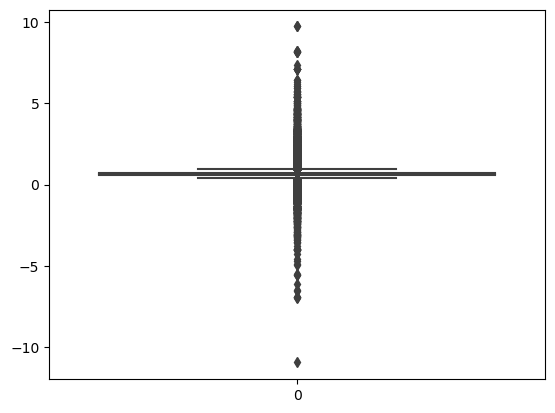

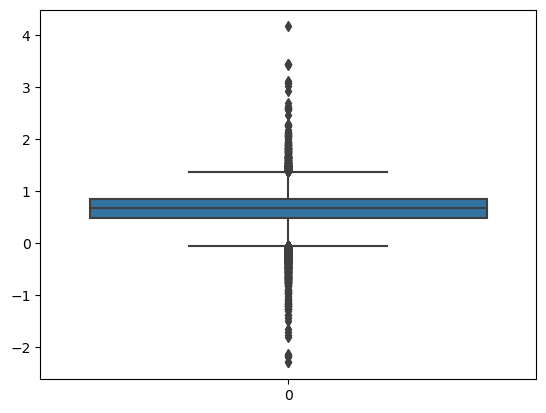

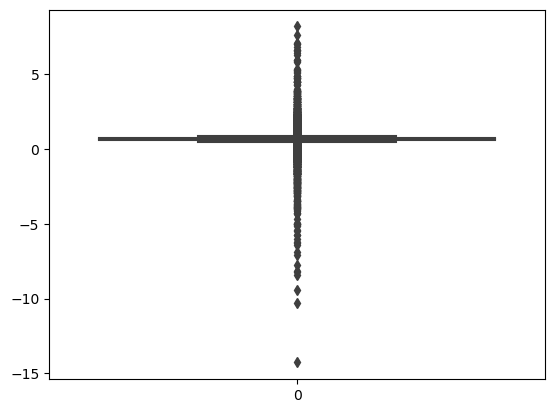

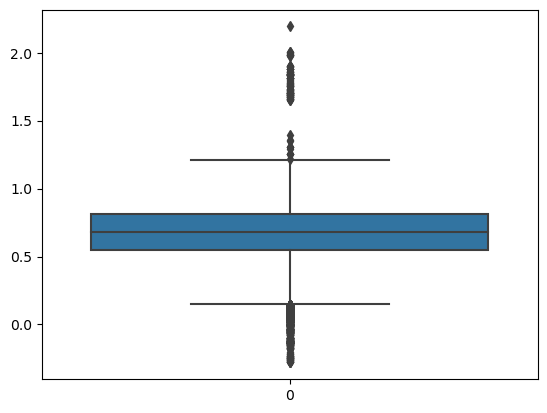

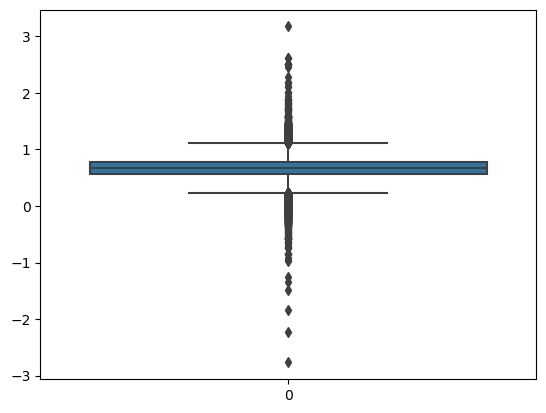

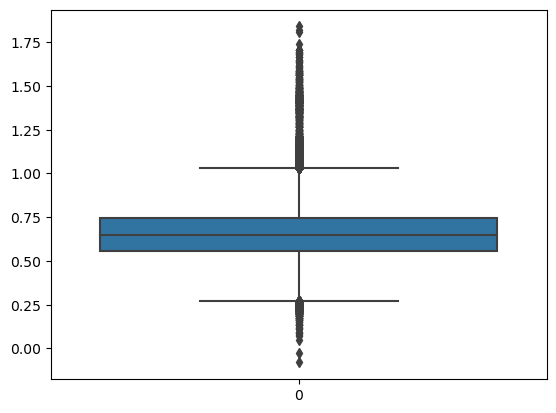

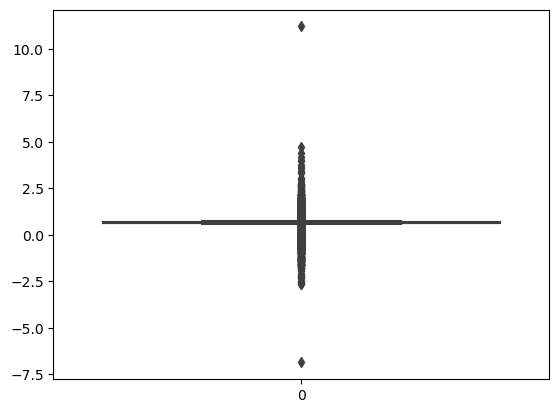

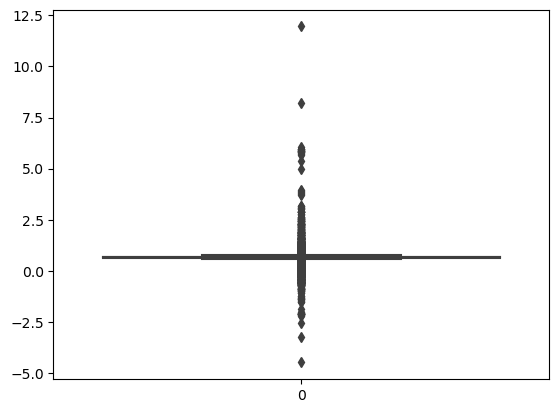

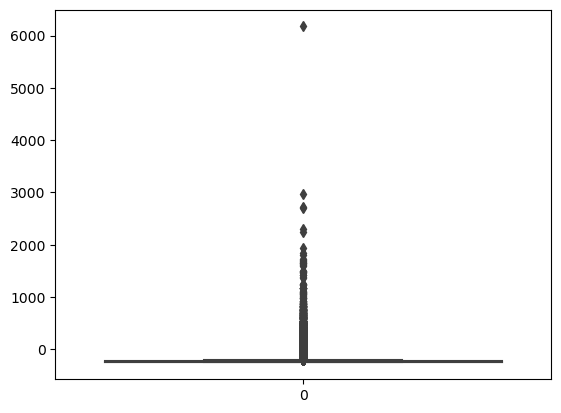

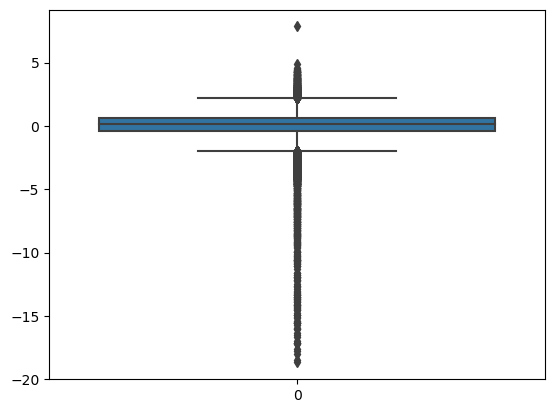

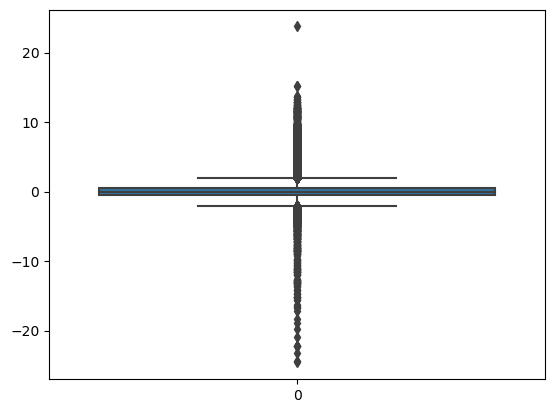

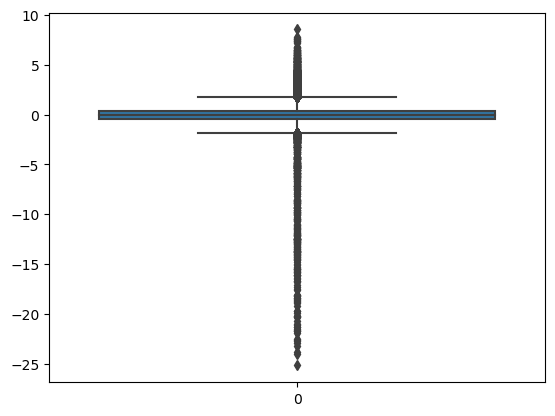

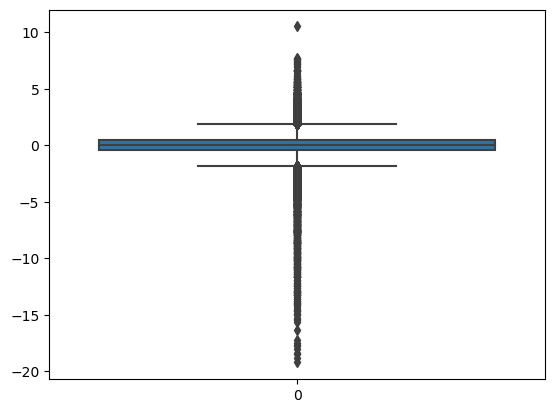

In [56]:
def boxplots(col):
    sns.boxplot(x[col])
    plt.show()
    
for i in list(x.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [58]:
x.describe()  
        

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,0.008908,-0.000123,0.001346,0.000350
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997629,1.091488,0.850169,0.957957
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-25.156000,-19.210000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.400000,-0.540000,-0.480000,-0.430000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.150000,-0.090000,-0.066000,0.050000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.630000,0.450000,0.400000,0.490000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,8.540000,10.530000


In [59]:
#Imabalnce check
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [60]:
#No of 1's
outlier_fraction=394/(394+227451) * 100
outlier_fraction

0.17292457591783889

In [61]:
#No of 0's
227451/(394+227451) * 100

99.82707542408215

In [62]:
# split train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify=y)
# stratify=y - handling imbalance dataset(to include both 0 and 1 data from y)

In [63]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(182276, 29) (45569, 29) (182276,) (45569,)


In [64]:
y_train.value_counts()

0.0    181961
1.0       315
Name: Target, dtype: int64

In [65]:
y_test.value_counts()

0.0    45490
1.0       79
Name: Target, dtype: int64

# Model Building

# Logistic Regression

In [66]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression

In [67]:
logit=LogisticRegression()
lr=logit.fit(x_train,y_train)
y_pred_train=logit.predict(x_train)
y_pred_test=logit.predict(x_test)

#Confusion Matrix
print(confusion_matrix(y_train,y_pred_train))
print()
print(confusion_matrix(y_test,y_pred_test)) 



[[181936     25]
 [   118    197]]

[[45484     6]
 [   31    48]]


In [68]:
#Classification Report
print(classification_report(y_train,y_pred_train)) 
print()
print(classification_report(y_test,y_pred_test)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.89      0.63      0.73       315

    accuracy                           1.00    182276
   macro avg       0.94      0.81      0.87    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.89      0.61      0.72        79

    accuracy                           1.00     45569
   macro avg       0.94      0.80      0.86     45569
weighted avg       1.00      1.00      1.00     45569



In [69]:
#Accuracy

print("Train Accuracy :" ,accuracy_score(y_train,y_pred_train)) 
print()
print("Test Accuracy :" ,accuracy_score(y_test,y_pred_test)) 

Train Accuracy : 0.99921547543286

Test Accuracy : 0.999188044503939


In [70]:
outlier_fraction = 394 / (394+227451)
outlier_fraction

0.001729245759178389

# Decision Tree

In [71]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [72]:
dt=dtree.fit(x_train,y_train)
y_pred_train_dt=dt.predict(x_train)
y_pred_test_dt=dt.predict(x_test)


In [73]:
#Confusion Matrix
print(confusion_matrix(y_train,y_pred_train_dt))
print()
print(confusion_matrix(y_test,y_pred_test_dt)) 

[[181961      0]
 [     0    315]]

[[45470    20]
 [   26    53]]


In [77]:
#Classification Report
print(classification_report(y_train,y_pred_train_dt))
print()
print(classification_report(y_test,y_pred_test_dt)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.76      0.66      0.71        79

    accuracy                           1.00     45569
   macro avg       0.88      0.83      0.85     45569
weighted avg       1.00      1.00      1.00     45569



In [74]:
#Accuracy
print("Train DT accuracy : ",accuracy_score(y_train,y_pred_train_dt))
print()
print("Test DT accuracy : ",accuracy_score(y_test,y_pred_test_dt))

Train DT accuracy :  1.0

Test DT accuracy :  0.998990541815708


#Overfitting happens with decision Tree

In [75]:
# Changing criterion to gini and checking

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini')

In [76]:
#Accuracy
print("Train DT accuracy : ",accuracy_score(y_train,y_pred_train_dt))
print()
print("Test DT accuracy : ",accuracy_score(y_test,y_pred_test_dt))

Train DT accuracy :  1.0

Test DT accuracy :  0.998990541815708


In [77]:
#same after checking with gini

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier()

In [79]:
rf=randf.fit(x_train,y_train)
y_pred_train_rf=randf.predict(x_train)
y_pred_test_rf=randf.predict(x_test)

In [80]:
#Confusion Matrix
print(confusion_matrix(y_train,y_pred_train_rf))
print()
print(confusion_matrix(y_test,y_pred_test_rf)) 

[[181961      0]
 [     1    314]]

[[45487     3]
 [   23    56]]


In [81]:
#Classification Report
print(classification_report(y_train,y_pred_train_rf))
print()
print(classification_report(y_test,y_pred_test_rf)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.71      0.81        79

    accuracy                           1.00     45569
   macro avg       0.97      0.85      0.91     45569
weighted avg       1.00      1.00      1.00     45569



In [82]:
#Accuracy
print("Train RF accuracy : ",accuracy_score(y_train,y_pred_train_rf))
print()
print("Test RF accuracy : ",accuracy_score(y_test,y_pred_test_rf))

Train RF accuracy :  0.9999945138142158

Test RF accuracy :  0.9994294366784436


# XGBOOST

In [83]:
from xgboost import XGBClassifier
xgboost=XGBClassifier()

xg=xgboost.fit(x_train,y_train)
y_pred_train_xg=xgboost.predict(x_train)
y_pred_test_xg=xgboost.predict(x_test)

#Confusion Matrix
print(confusion_matrix(y_train,y_pred_train_xg))
print()
print(confusion_matrix(y_test,y_pred_test_xg)) 
print()

#Classification Report
print(classification_report(y_train,y_pred_train_xg))
print()
print(classification_report(y_test,y_pred_test_xg)) 
print()

#Accuracy
print("Train XG accuracy : ",accuracy_score(y_train,y_pred_train_xg))
print()
print("Test XG accuracy : ",accuracy_score(y_test,y_pred_test_xg))

[[181961      0]
 [     0    315]]

[[45488     2]
 [   22    57]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.97      0.72      0.83        79

    accuracy                           1.00     45569
   macro avg       0.98      0.86      0.91     45569
weighted avg       1.00      1.00      1.00     45569


Train XG accuracy :  1.0

Test XG accuracy :  0.9994733261647173


# Support Vector machine

In [84]:
from sklearn.svm import SVC
SVClass=SVC()

svm=SVClass.fit(x_train,y_train)
y_pred_train_svm=SVClass.predict(x_train)
y_pred_test_svm=SVClass.predict(x_test)

#Confusion Matrix
print(confusion_matrix(y_train,y_pred_train_svm))
print()
print(confusion_matrix(y_test,y_pred_test_svm)) 
print()

#Classification Report
print(classification_report(y_train,y_pred_train_svm))
print()
print(classification_report(y_test,y_pred_test_svm)) 
print()

#Accuracy
print("Train SVM accuracy : ",accuracy_score(y_train,y_pred_train_svm))
print()
print("Test SVM accuracy : ",accuracy_score(y_test,y_pred_test_svm))

[[181936     25]
 [   207    108]]

[[45484     6]
 [   57    22]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.81      0.34      0.48       315

    accuracy                           1.00    182276
   macro avg       0.91      0.67      0.74    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.79      0.28      0.41        79

    accuracy                           1.00     45569
   macro avg       0.89      0.64      0.71     45569
weighted avg       1.00      1.00      1.00     45569


Train SVM accuracy :  0.9987272048980667

Test SVM accuracy :  0.9986174811823828


# Naive Bayes Theorem

In [85]:
#Naive Bayes is a probability approach
from sklearn.naive_bayes import BernoulliNB
nb_model=BernoulliNB()

nb=nb_model.fit(x_train,y_train)
y_pred_train_nb=nb.predict(x_train)
y_pred_test_nb=nb.predict(x_test)

#Confusion Matrix
print(confusion_matrix(y_train,y_pred_train_nb))
print()
print(confusion_matrix(y_test,y_pred_test_nb)) 
print()

#Classification Report
print(classification_report(y_train,y_pred_train_nb))
print()
print(classification_report(y_test,y_pred_test_nb)) 
print()

#Accuracy
print("Train NB accuracy : ",accuracy_score(y_train,y_pred_train_nb))
print()
print("Test NB accuracy : ",accuracy_score(y_test,y_pred_test_nb))

[[181595    366]
 [    95    220]]

[[45387   103]
 [   29    50]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.38      0.70      0.49       315

    accuracy                           1.00    182276
   macro avg       0.69      0.85      0.74    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.33      0.63      0.43        79

    accuracy                           1.00     45569
   macro avg       0.66      0.82      0.71     45569
weighted avg       1.00      1.00      1.00     45569


Train NB accuracy :  0.997470868353486

Test NB accuracy :  0.9971032939059449


# Voting Classifier

In [86]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('logit',lr),('dtree',dt),('randf',rf),('xgboost',xg),('SVClass',svm),('nb_model',nb)])
voting_evc=voting.fit(x_train,y_train)

y_pred_train_vote=voting_evc.predict(x_train)
y_pred_test_vote=voting_evc.predict(x_test)

#Confusion Matrix
print(confusion_matrix(y_train,y_pred_train_vote))
print()
print(confusion_matrix(y_test,y_pred_test_vote)) 
print()

#Classification Report
print(classification_report(y_train,y_pred_train_vote))
print()
print(classification_report(y_test,y_pred_test_vote)) 
print()

#Accuracy
print("Train Voing accuracy : ",accuracy_score(y_train,y_pred_train_vote))
print()
print("Test Voting accuracy : ",accuracy_score(y_test,y_pred_test_vote))

[[181961      0]
 [    78    237]]

[[45488     2]
 [   26    53]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      0.75      0.86       315

    accuracy                           1.00    182276
   macro avg       1.00      0.88      0.93    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.96      0.67      0.79        79

    accuracy                           1.00     45569
   macro avg       0.98      0.84      0.90     45569
weighted avg       1.00      1.00      1.00     45569


Train Voing accuracy :  0.9995720775088328

Test Voting accuracy :  0.9993855471921701


In [94]:
#***Voting is mainly used when model accuracy is above 50% and less than 70%

In [87]:
point1=['Logistic','Dtree','Rforest','XGBoost','SVM','NB','Voting']
point2=[accuracy_score(y_test,y_pred_test),accuracy_score(y_test,y_pred_test_dt),accuracy_score(y_test,y_pred_test_rf),accuracy_score(y_test,y_pred_test_xg),
        accuracy_score(y_test,y_pred_test_svm),accuracy_score(y_test,y_pred_test_nb),accuracy_score(y_test,y_pred_test_vote)]

final_output= pd.DataFrame({"Method Used":point1,"Accuracy":point2})
print(final_output)

  Method Used  Accuracy
0    Logistic  0.999188
1       Dtree  0.998991
2     Rforest  0.999429
3     XGBoost  0.999473
4         SVM  0.998617
5          NB  0.997103
6      Voting  0.999386


Axes(0.125,0.11;0.775x0.77)


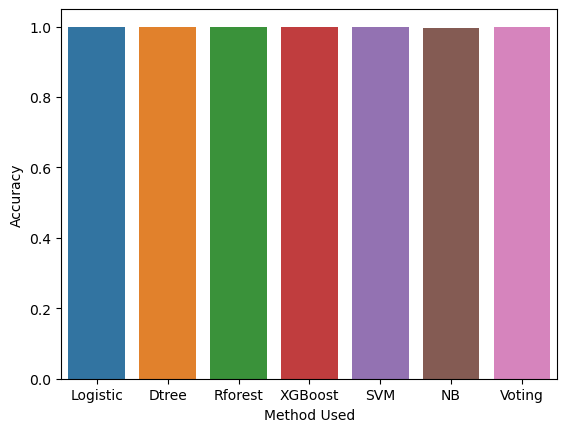

In [88]:
#Visualisation
import mpl_toolkits

chart=sns.barplot(x="Method Used",y="Accuracy",data=final_output)
chart.ticklabel_format(axis='both')

#chart.set_xticklabels(chart.getxticklabels(),rotation=90)
print(chart)

# Stacking Method

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB


In [90]:
estimators=[('dt',DecisionTreeClassifier()),
           ('rf',RandomForestClassifier()),
           ('gdbt',GradientBoostingClassifier()),
           ('svc',SVC()),
           ('nbt',BernoulliNB())] #Not considering Logististic Regression because it already provides fair accuracy individually

In [91]:
from sklearn.ensemble import StackingClassifier
classifier=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(),cv=10)

In [92]:

classifier.fit(x_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('gdbt', GradientBoostingClassifier()),
                               ('svc', SVC()), ('nbt', BernoulliNB())],
                   final_estimator=LogisticRegression())

In [93]:
y_predict_train=classifier.predict(x_train)
y_predict_test=classifier.predict(x_test)

#Confusion Matrix
print(confusion_matrix(y_train,y_predict_train))
print()
print(confusion_matrix(y_test,y_predict_test))
print()

#Classification Report
print(classification_report(y_train,y_predict_train))
print()
print(classification_report(y_test,y_predict_test)) 
print()

#Accuracy
print("Train Stacking accuracy : ",accuracy_score(y_train,y_predict_train))
print()
print("Test Stacking accuracy : ",accuracy_score(y_test,y_predict_test))

[[181961      0]
 [    48    267]]

[[45488     2]
 [   28    51]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      0.85      0.92       315

    accuracy                           1.00    182276
   macro avg       1.00      0.92      0.96    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.96      0.65      0.77        79

    accuracy                           1.00     45569
   macro avg       0.98      0.82      0.89     45569
weighted avg       1.00      1.00      1.00     45569


Train Stacking accuracy :  0.9997366630823586

Test Stacking accuracy :  0.9993416577058966


# ISOLATION FOREST CLASSIFIER -ANOMALY DETECTION

In [94]:
from sklearn.ensemble import IsolationForest


In [95]:
isolation=IsolationForest(contamination=outlier_fraction)# contamination means the level of different data/outlier data in the dataset

isolation.fit(x_train,y_train)

IsolationForest(contamination=0.001729245759178389)

In [96]:
anomaly_pred_train=isolation.predict(x_train)
anomaly_pred_test=isolation.predict(x_test)

#Confusion Matrix
print(confusion_matrix(y_train,anomaly_pred_train))
print()
print(confusion_matrix(y_test,anomaly_pred_test))
print()

#Classification Report
print(classification_report(y_train,anomaly_pred_train))
print()
print(classification_report(y_test,anomaly_pred_test)) 
print()

#Accuracy
print("Train Anomaly_detection accuracy : ",accuracy_score(y_train,anomaly_pred_train))
print()
print("Test Anomaly_detection accuracy : ",accuracy_score(y_test,anomaly_pred_test))

[[     0      0      0]
 [   225      0 181736]
 [    91      0    224]]

[[    0     0     0]
 [   60     0 45430]
 [   21     0    58]]

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00    181961
         1.0       0.00      0.71      0.00       315

    accuracy                           0.00    182276
   macro avg       0.00      0.24      0.00    182276
weighted avg       0.00      0.00      0.00    182276


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00     45490
         1.0       0.00      0.73      0.00        79

    accuracy                           0.00     45569
   macro avg       0.00      0.24      0.00     45569
weighted avg       0.00      0.00      0.00     45569


Train Anomaly_detection accuracy :  0.0012289056156597688

Test Anomaly_detection accuracy :  0.0

In [97]:
#Find the outliers
for i,x in enumerate(x_test):
    if anomaly_pred_test[i]== -1:
        print("Anomaly Detected : ",x)
    else:
        print("Normal Transaction : ",x) 

Normal Transaction :  Per1
Normal Transaction :  Per2
Normal Transaction :  Per3
Normal Transaction :  Per4
Normal Transaction :  Per5
Normal Transaction :  Per6
Normal Transaction :  Per7
Normal Transaction :  Per8
Normal Transaction :  Per9
Normal Transaction :  Dem1
Normal Transaction :  Dem2
Normal Transaction :  Dem3
Normal Transaction :  Dem4
Normal Transaction :  Dem5
Normal Transaction :  Dem6
Normal Transaction :  Dem7
Normal Transaction :  Dem8
Normal Transaction :  Dem9
Normal Transaction :  Cred1
Normal Transaction :  Cred2
Normal Transaction :  Cred3
Normal Transaction :  Cred4
Normal Transaction :  Cred5
Normal Transaction :  Cred6
Normal Transaction :  Normalised_FNT
Normal Transaction :  geo_score
Normal Transaction :  instance_scores
Normal Transaction :  qsets_normalized_tat
Normal Transaction :  lambda_wt


In [99]:
x_test

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
148301,0.540000,0.860000,0.990000,-0.073333,0.766667,0.326667,1.000000,0.593333,0.913333,0.966667,...,0.660000,0.683333,0.390000,0.743333,0.656667,-249.7500,0.30,-0.95,-0.886,0.45
46653,1.056667,0.513333,1.003333,0.690000,0.326667,0.703333,0.410000,0.746667,1.003333,0.853333,...,0.690000,0.713333,0.983333,0.653333,0.666667,-245.6675,1.00,-0.28,-0.210,-0.32
54292,1.076667,0.746667,0.946667,0.903333,0.426667,0.320000,0.643333,0.593333,0.686667,0.720000,...,0.916667,0.750000,0.736667,0.663333,0.676667,-249.7525,0.87,-0.09,-0.400,-0.01
33362,-0.073333,1.430000,0.860000,0.590000,0.430000,0.413333,0.710000,0.900000,0.750000,0.710000,...,0.793333,0.663333,0.693333,0.796667,0.700000,-247.7750,0.75,0.93,0.160,0.14
19723,0.510000,0.563333,1.213333,0.656667,0.323333,0.826667,0.753333,0.760000,0.816667,0.770000,...,0.683333,0.330000,0.963333,0.696667,0.730000,-207.1700,0.39,-0.58,0.030,-0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223173,1.136667,0.080000,0.003333,0.733333,0.296667,0.006667,0.906667,0.450000,0.420000,0.493333,...,0.986667,0.643333,0.913333,0.606667,0.663333,-151.5300,-0.58,0.83,0.610,0.89
39389,-1.266667,2.106667,-1.606667,1.443333,-0.453333,-0.146667,-0.023333,1.933333,0.996667,0.913333,...,0.780000,0.660000,0.520000,0.673333,0.583333,-227.5025,-1.36,-1.17,5.264,0.51
215541,1.063333,0.693333,0.670000,0.896667,0.543333,0.270000,0.773333,0.576667,0.680000,0.506667,...,0.800000,0.840000,0.790000,0.643333,0.670000,-237.5575,-0.33,-0.01,-0.230,0.62
12533,1.320000,0.653333,0.443333,0.853333,0.556667,0.463333,0.520000,0.650000,0.950000,0.686667,...,1.000000,0.456667,0.700000,0.663333,0.666667,-247.5025,0.77,-0.52,0.504,-1.46


In [100]:
#FINAL CLASSIFICATION MODEL

In [101]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [102]:
final_classification_model={'IsolationForest':IsolationForest(n_estimators=100,contamination=outlier_fraction,max_samples=len(x1)),
                            'LocalOutlierFactor':LocalOutlierFactor(contamination=outlier_fraction),
                            'OneClassSVM':OneClassSVM()}

In [103]:
len(x1)

227845

In [ ]:
train_data.columns

In [104]:
fraud=train_data[train_data['Target']==1]
normal=train_data[train_data['Target']==0]

In [105]:
len(fraud)

394

In [ ]:
total_ouliers=len(fraud)

for i , (clf_name, clf) in enumerate(final_classification_model.items()):
    if clf_name =="LocalOutlierFactor" :
        y_pred = clf.fit_predict(x_test)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name =="OneClassSVM":
        clf.fit(x_train)
        y_pred = clf.predict(x_test)
    
    else:
        clf.fit(x_train)
        score_prediction = clf.decision_function(x_train)
        y_pred = clf.predict(x_test)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_error = (y_pred !=y_test).sum()
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(y_test, y_pred))

IsolationForest : 116
Accuracy Score :
0.9974544097961333
LocalOutlierFactor : 120
Accuracy Score :
0.9973666308235862
